In [11]:
import matplotlib.pyplot as plt
import os 
import pandas as pd

In [12]:
df = pd.read_csv(os.path.join("data", "online_retail_II_preprocessed.csv")) # read the csv file

In [13]:
### measure variables - recency, frequency, and monetary value
rec = df.groupby(['Customer ID']).mean()['Recency'] # recency was calculated in preprocessing code 
'''
### code for calculating recency - from preprocessing code ###
# df_val is the dataset after dropping the nans or invalid (e.g. negative quantity) data
present = dt.datetime(2012,1,1)
df_val['Recency'] = (present - df_val.groupby(['Customer ID'])['InvoiceDate'].transform(max)).dt.days
'''
freq = df.groupby(['Customer ID']).count()['Invoice'] # frequency number of purchases since the first purchase 
# monetary value average spending per order
df['Spending'] = df['Price']*df['Quantity']
mon =  df.groupby(['Customer ID']).mean()['Spending'] # monetary value average spending per order

/var/folders/vg/9frsl_4j0xd91tddcqtwkgpr0000gn/T/ipykernel_23039/2013441190.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rec = df.groupby(['Customer ID']).mean()['Recency'] # recency was calculated in preprocessing code
/var/folders/vg/9frsl_4j0xd91tddcqtwkgpr0000gn/T/ipykernel_23039/2013441190.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mon =  df.groupby(['Customer ID']).mean()['Spending'] # monetary value average spending per order


In [14]:

### for each dimension, divide all customers into three groups evenly. 
seg = [1]*(len(rec)//3) + [2]*(len(rec)- len(rec)//3*2) + [3]*(len(rec)//3) # score: 1 for lowest, 2 for medium, 3 for highest
rec = rec.sort_values(ascending=False).to_frame()
freq = freq.sort_values().to_frame("Frequency")
mon = mon.sort_values().to_frame("MonetaryValue")
rec['Recency_score'] = seg
freq['Freq_score'] = seg
mon['MV_score'] = seg
df['R_score'] = [1]*len(df.index)
df['F_score'] = [1]*len(df.index)
df['M_score'] = [1]*len(df.index)
df.loc[df['Customer ID'].isin(rec[rec['Recency_score']==2].index),'R_score'] = 2
df.loc[df['Customer ID'].isin(rec[rec['Recency_score']==3].index),'R_score'] = 3
df.loc[df['Customer ID'].isin(freq[freq['Freq_score']==2].index),'F_score'] = 2
df.loc[df['Customer ID'].isin(freq[freq['Freq_score']==3].index),'F_score'] = 3
df.loc[df['Customer ID'].isin(mon[mon['MV_score']==2].index),'M_score'] = 2
df.loc[df['Customer ID'].isin(mon[mon['MV_score']==3].index),'M_score'] = 3
rfm = df.groupby(['R_score', 'F_score', 'M_score'])

R_score  F_score  M_score
1        1        1          266
                  2          359
                  3          456
         2        1          317
                  2          225
                  3          134
         3        1          132
                  2           43
                  3           27
2        1        1          105
                  2          198
                  3          297
         2        1          188
                  2          313
                  3          241
         3        1          271
                  2          204
                  3          143
3        1        1           43
                  2          103
                  3          132
         2        1          152
                  2          206
                  3          184
         3        1          485
                  2          309
                  3          345
Name: Customer ID, dtype: int64
R_score  F_score  M_score
1        1        1      

<Axes: xlabel='R_score,F_score,M_score'>

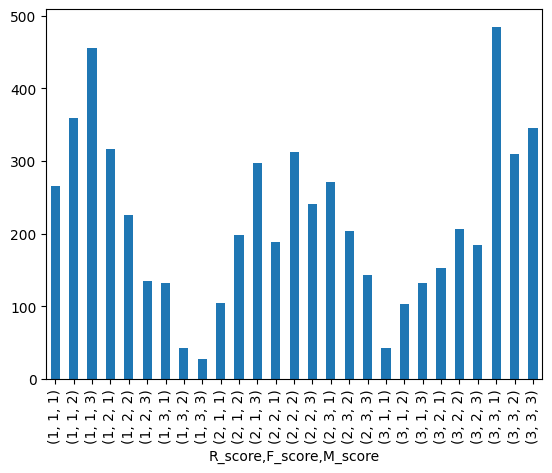

In [15]:
pd.options.display.float_format = '{:.2f}'.format
print(rfm.nunique()['Customer ID']) 
print(rfm.nunique()['Customer ID']/rfm.nunique()['Customer ID'].sum()*100) # proportion 
%matplotlib inline
rfm.nunique()['Customer ID'].plot.bar()

In [16]:
print("number of countries in each group")
print(rfm.nunique()['Country']) 
print("most frequent countries of the customers in each group")
tmp = df.groupby('Customer ID').max().get(['R_score', 'F_score', 'M_score', 'Country'])
print(tmp.groupby(['R_score', 'F_score', 'M_score'])['Country'].apply(pd.Series.mode)) 

number of countries in each group
R_score  F_score  M_score
1        1        1           9
                  2          14
                  3          17
         2        1           9
                  2          15
                  3          18
         3        1           3
                  2           3
                  3           9
2        1        1           4
                  2           9
                  3          16
         2        1           3
                  2          18
                  3          20
         3        1           4
                  2          10
                  3          18
3        1        1           2
                  2           7
                  3          10
         2        1           3
                  2          10
                  3          15
         3        1           6
                  2          11
                  3          21
Name: Country, dtype: int64
most frequent countries of the customers in each

In [17]:
print("which weekday were the purchases made most frequently?")
tmp = df.groupby('Invoice').max().get(['R_score', 'F_score', 'M_score', 'Weekday'])
print(tmp.groupby(['R_score', 'F_score', 'M_score'])['Weekday'].apply(pd.Series.mode))

which weekday were the purchases made most frequently?
R_score  F_score  M_score   
1        1        1        0      Tuesday
                           1    Wednesday
                  2        0     Thursday
                  3        0      Tuesday
                           1    Wednesday
         2        1        0       Sunday
                  2        0     Thursday
                  3        0      Tuesday
         3        1        0       Sunday
                  2        0     Thursday
                  3        0     Thursday
                           1    Wednesday
2        1        1        0     Thursday
                  2        0     Thursday
                  3        0     Thursday
         2        1        0     Thursday
                  2        0     Thursday
                  3        0     Thursday
         3        1        0       Sunday
                  2        0     Thursday
                  3        0     Thursday
3        1        1        0      

contribution in aggrgated sales
R_score  F_score  M_score
1        1        1           44072.51
                  2           91822.07
                  3          297082.22
         2        1          128164.14
                  2          209068.87
                  3          360259.20
         3        1          190263.70
                  2          176885.49
                  3          274258.04
2        1        1           18088.95
                  2           58307.86
                  3          320341.09
         2        1          100644.51
                  2          315284.89
                  3          616486.64
         3        1          625216.73
                  2          721828.65
                  3          959399.93
3        1        1            8162.32
                  2           30437.10
                  3          291856.46
         2        1           85234.31
                  2          205836.75
                  3          503807.05
      

/var/folders/vg/9frsl_4j0xd91tddcqtwkgpr0000gn/T/ipykernel_23039/2464572255.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  contrib = rfm.sum()['Spending']


<Axes: xlabel='R_score,F_score,M_score'>

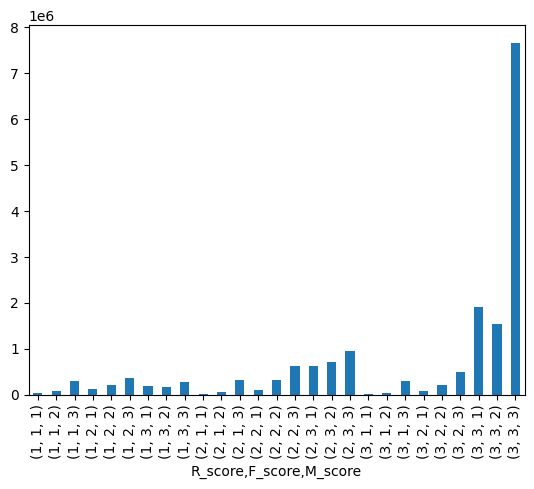

In [18]:
print("contribution in aggrgated sales")
contrib = rfm.sum()['Spending']
print(contrib)
print(contrib/contrib.sum()*100) # proportion
contrib.plot.bar()